In [1]:
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
teststring = 'GATGGAACTTGACTACGTAAATT'
teststring2 = 'AAAACCCGGT'
teststring3 = 'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC'

## Problem

An **RNA string** is a string formed from the alphabet containing 'A', 'C', 'G', and 'U'.

Given a DNA string t
corresponding to a coding strand, its transcribed RNA string u is formed by replacing all occurrences of 'T' in t with 'U' in u

.

Given: A DNA string t

having length at most 1000 nt.

Return: The transcribed RNA string of t
.

In [3]:
def DNAtoRNA(string):
    ''' Transform a DNA string to an equivalent RNA string, by tranforming
    all the thymine bases to uracil, irrespective or whether they are
    capital or small letters.
    '''
    
    return string.replace('T','U').replace('t','u')
    
    

In [4]:
print('DNA Test string transformed into RNA:\n', DNAtoRNA(teststring))
print('DNA Test string transformed into RNA (in lower case):\n', DNAtoRNA(teststring.lower()))

DNA Test string transformed into RNA:
 GAUGGAACUUGACUACGUAAAUU
DNA Test string transformed into RNA (in lower case):
 gauggaacuugacuacguaaauu


We can also include some benchmarking time (and see how it scales with the length of the string):

In [5]:
%timeit DNAtoRNA(teststring)

193 ns ± 0.554 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [6]:
def evaluatetime(testfunction, string, nl = 100, nt = 30):
    ''' Function to evaluate time
    '''
    times = np.zeros((nl,2))
    ts = np.zeros(nt)

    for i in range(nl):
        for j in range(nt):
            t0 = time.perf_counter()
            test = testfunction(string*i)
            t1 = time.perf_counter()
            ts[j] = t1-t0

        times[i,:] = ts.mean(), ts.std()
    return times

In [7]:
nl = 100
times = evaluatetime(DNAtoRNA, teststring, nl)

(0, 7)

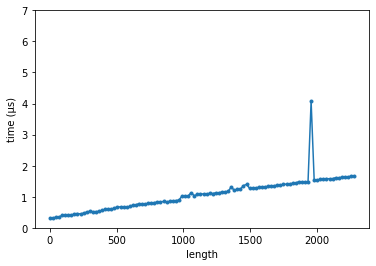

In [8]:

plt.plot(np.arange(nl)*len(teststring),times[:,0]/1e-6, '.-')

plt.xlabel('length')
plt.ylabel('time (µs)')
plt.ylim(0,7)


## Problem

In DNA strings, symbols 'A' and 'T' are complements of each other, as are 'C' and 'G'.

The **reverse complement** of a DNA string s
is the string sc formed by reversing the symbols of s

, then taking the complement of each symbol (e.g., the reverse complement of "GTCA" is "TGAC").

Given: A DNA string s

of length at most 1000 bp.

Return: The reverse complement sc
of s.

In [9]:
def elementarycomplement(string, base, comp_base, swap='x'): 
    ''' Elementary swap of basis
    '''
    return string.replace(base,swap).replace(comp_base,base).replace(swap, comp_base)

def DNAreversecomplement(string):
    '''Transform a DNA string to its reverse complement.
    '''
    complement = string[::-1]
    complement = elementarycomplement(complement,'A','T')
    complement = elementarycomplement(complement,'G','C')
    return complement

In [10]:
print('The reverse complement of {} is {}'.format(teststring2,
                               DNAreversecomplement(teststring2)))
print('The reverse complement of {} is {}'.format(teststring,
                               DNAreversecomplement(teststring)))

The reverse complement of AAAACCCGGT is ACCGGGTTTT
The reverse complement of GATGGAACTTGACTACGTAAATT is AATTTACGTAGTCAAGTTCCATC


In [11]:
times_RC = evaluatetime(DNAreversecomplement, teststring, nl)

(0, 25)

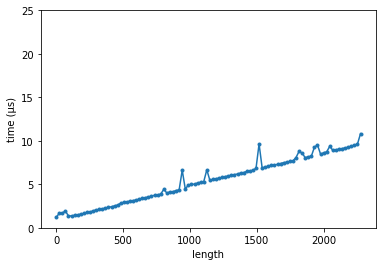

In [12]:
plt.plot(np.arange(nl)*len(teststring),times_RC[:,0]/1e-6, '.-')

plt.xlabel('length')
plt.ylabel('time (µs)')
plt.ylim(0,25)
